<a href="https://colab.research.google.com/github/Vineet2107/Deep-Neural-Networks-with-PyTorch/blob/main/Assignment1_CE784.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import matplotlib.pyplot as plt
import os
import glob
from skimage import io, color
from skimage.feature.texture import greycomatrix, greycoprops
import numpy as np
import pandas as pd
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import entropy
import cv2 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
% matplotlib inline

In [55]:
train_path = '/content/drive/MyDrive/mod_ravelling_dataset/train'
test_path = '/content/drive/MyDrive/mod_ravelling_dataset/test'

In [56]:
Non_raveling_data = '/content/drive/MyDrive/mod_ravelling_dataset/train/Non_raveling'
#Raveling = train_path + '/Raveling'

In [57]:
Non_raveling_data

'/content/drive/MyDrive/mod_ravelling_dataset/train/Non_raveling'

In [58]:
list_nr = os.listdir(Non_raveling_data)

In [59]:
list_nr[0]

'image466.jpg'

In [10]:
list_r = (os.listdir(Raveling))

In [41]:
list_r[:5]

['image508.jpg', 'image644.jpg', 'image24.jpg', 'image89.jpg', 'image263.jpg']

In [60]:
img = []

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


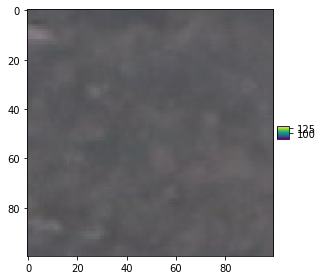

In [70]:
img_nr = []

for i in range(len(list_nr)):
  img = io.imread(os.path.join(Non_raveling_data,list_nr[i]))
  img_nr.append(np.array(img))
  io.imshow(img)


In [71]:
len(img_nr)

351

In [73]:
img_nr = np.array(img_nr)

In [74]:
img_nr.shape

(351, 100, 100, 3)

In [ ]:
def mean(arr[][]):
  


In [ ]:
img_prop = [][]

for i in range(len(images_nr)):
  imgprop[i][0] = mean(image_nr[i][][0])
  imgprop[i][1] = stdev(image_nr[i][][1])
  imgprop[i][2] = kurtosis(image_nr[i][][2])
  imgprop[i][3] = skewness(image_nr[i][][3])
  imgprop[i][4] = mean(image_nr[i][][0])
  imgprop[i][5] = stdev(image_nr[i][][1])
  imgprop[i][6] = kurtosis(image_nr[i][][2])
  imgprop[i][7] = skewness(image_nr[i][][3])
  imgprop[i][8] = mean(image_nr[i][][0])
  imgprop[i][9] = stdev(image_nr[i][][1])
  imgprop[i][10] = kurtosis(image_nr[i][][2])
  imgprop[i][11] = skewness(image_nr[i][][3])
    
  


In [49]:
images_nr = np.array(images_nr)

In [52]:
images_nr.shape

(351, 100, 100, 3)

In [53]:
path = os.path.join(Non_raveling_data,list_nr[0])

In [28]:
path

'/content/drive/MyDrive/mod_ravelling_dataset/train/Non_raveling/image466.jpg'

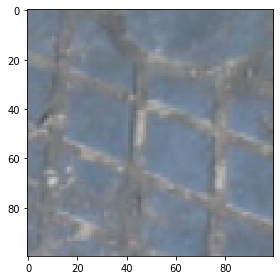

In [30]:
for i in range(10):
  img = io.imread(os.path.join(Non_raveling_data,list_nr[i]))
  io.imshow(img)
